In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#Importing Data
df = pd.read_csv(r'C:\Users\kunwa\Downloads\Fraud Detection.csv' , encoding='unicode_escape')

# Understanding the data

In [63]:
#Understanding the data length
df.shape

(20, 6)

In [6]:
#Checking First Five Rows & Columns
df.head()

,Transaction_ID,Customer_ID,Transaction_Amount,Location,Time_of_Day,Is_Fraudulent
0,1,101,1000,Mumbai,Morning,0
1,2,102,500,Delhi,Afternoon,1
2,3,103,2000,Chennai,Evening,0
3,4,104,300,Gujarat,Morning,1
4,5,105,800,Bengalore,Afternoon,0


In [17]:
#Checking for datatypes
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Transaction_ID      20 non-null     int64 
 1   Customer_ID         20 non-null     int64 
 2   Transaction_Amount  20 non-null     int64 
 3   Location            20 non-null     object
 4   Time_of_Day         20 non-null     object
 5   Is_Fraudulent       20 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.1+ KB


In [18]:
#checking for null values
pd.isnull(df).sum()

Transaction_ID        0
Customer_ID           0
Transaction_Amount    0
Location              0
Time_of_Day           0
Is_Fraudulent         0
dtype: int64

# Exploratory Data Analysis

In [80]:
fraud = df.loc[df['Is_Fraudulent'] == 1]     #assigning fraud transation values separately
normal = df.loc[df['Is_Fraudulent'] == 0]    #assigning normal transaction values separately

In [81]:
#total fraud transactions
len(fraud)

8

In [21]:
#total normal transcation
len(normal)     #total normal transcation

12

In [22]:
#Transcation Percentage
transaction_percent = df['Is_Fraudulent'].value_counts(normalize= 'True')

In [23]:
transaction_percent

Is_Fraudulent
0    0.6
1    0.4
Name: proportion, dtype: float64

#### We can clearly see above that 60% transactions are normal & about 40% is fraud.

[Text(0, 0, 'Mumbai'),
 Text(1, 0, 'Delhi'),
 Text(2, 0, 'Chennai'),
 Text(3, 0, 'Gujarat'),
 Text(4, 0, 'Bengalore')]

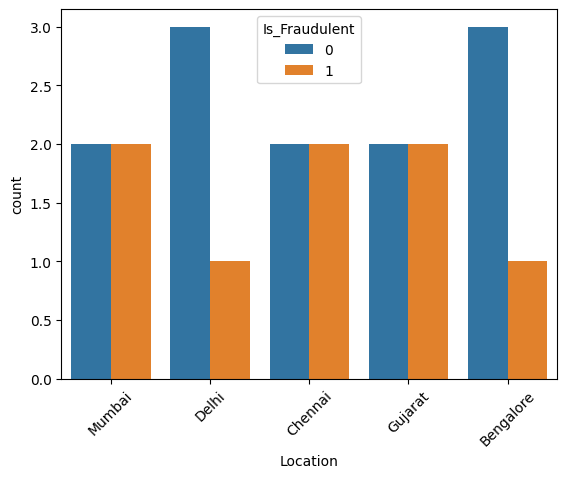

In [59]:
#Comapring fraudulence with respect to location
cp= sns.countplot(data= df, x='Location', hue='Is_Fraudulent')
cp.set_xticklabels(cp.get_xticklabels(), rotation=45)

#### From above chart we can see that Fraudulent transactions are in every location and don't have target on any particular location.

[Text(0, 0, '300'),
 Text(1, 0, '350'),
 Text(2, 0, '400'),
 Text(3, 0, '500'),
 Text(4, 0, '700'),
 Text(5, 0, '800'),
 Text(6, 0, '900'),
 Text(7, 0, '1000'),
 Text(8, 0, '1200'),
 Text(9, 0, '1300'),
 Text(10, 0, '1500'),
 Text(11, 0, '1700'),
 Text(12, 0, '1800'),
 Text(13, 0, '2000'),
 Text(14, 0, '2200'),
 Text(15, 0, '2500'),
 Text(16, 0, '3000')]

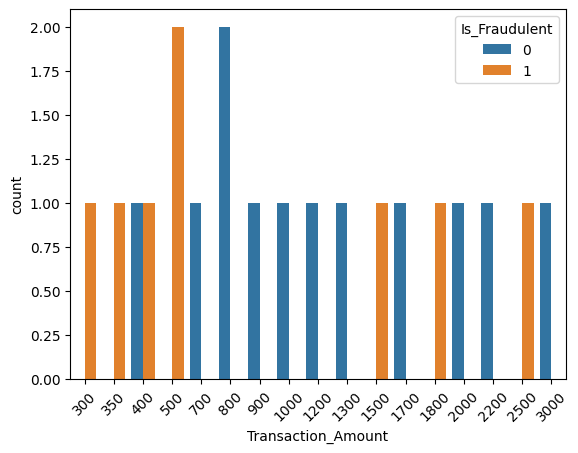

In [62]:
#Comparing Fraudulence with transaction amount
cm= sns.countplot(data= df, x='Transaction_Amount', hue='Is_Fraudulent')
cm.set_xticklabels(cm.get_xticklabels(), rotation=45)

#### From above chart we can see that Fraudulence is not dependent to just big or small amount.

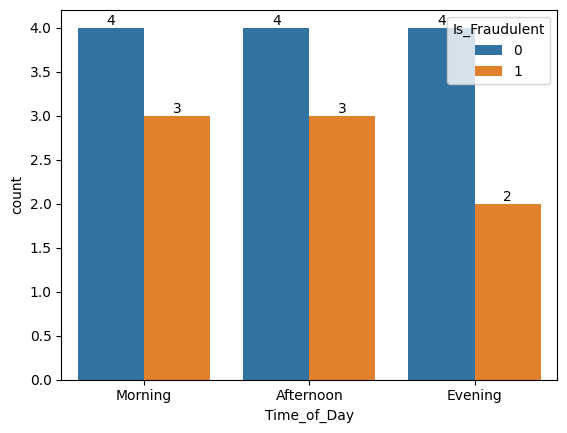

In [138]:
#Comparing Fraudulence with respect to time of day
cx = sns.countplot(x= 'Time_of_Day', data=df, hue="Is_Fraudulent")

for bars in cx.containers:
    cx.bar_label(bars)

#### From above chart we can see that fraudulent can happen any time of the day as it has happened.

In [132]:
#Total transaction amount of the customers
df['Transaction_Amount'].sum()

23850

In [134]:
#Sum of fraud transaction amount
fraud = df.loc[df['Is_Fraudulent'] == 1].sum()

In [135]:
fraud

Transaction_ID                                                       78
Customer_ID                                                         878
Transaction_Amount                                                 7850
Location              DelhiGujaratMumbaiChennaiMumbaiChennaiBengalor...
Time_of_Day           AfternoonMorningEveningAfternoonAfternoonMorni...
Is_Fraudulent                                                         8
dtype: object

In [136]:
#Sum of normal transaction amount
normal = df.loc[df['Is_Fraudulent'] == 0].sum()

In [137]:
normal

Transaction_ID                                                      132
Customer_ID                                                        1332
Transaction_Amount                                                16000
Location              MumbaiChennaiBengaloreDelhiGujaratBengaloreDel...
Time_of_Day           MorningEveningAfternoonMorningEveningMorningEv...
Is_Fraudulent                                                         0
dtype: object

#### From above data we can see that from total transaction of 23850, normal transaction amount is 16000 and fraud transcation amount is 7850.

## Conclusion

### We can see from above analysis that fraud transaction rate of XYZ company is very high(40%). The company should immediately look into its Online Security System and most probably should get it changed or get it stronger. Not doing this can lead to less trust of customers. We can cleary see that the fraudulent transactions have minimal or no effect from location,time or amount.